In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
# Test with PCA from scikit-learn
from sklearn.decomposition import PCA

### Implement PCA

In [12]:
class PCA_T:
    def __init__(self, n_components, use_svd=False):
        
        self.n_components = n_components
        self.use_svd = use_svd
        self.W = []
        
    def fit(self, input):
        """
        input's shape (n, m): n-> number of samples, m -> input's dimension
        """
        n, m = input.shape
        assert self.n_components < m, "n_component must be smaller than input's dimension"
        self.n_components = min(n, self.n_components)
        
        # reset W
        self.W = []
        
        # substract by mean     
        input -= input.mean(axis=0)
        
        if not self.use_svd:
            # compute covariance matrix
            cov_mat = np.dot(input.T, input) / (n - 1)

            # compute eigenvalues and eigenvector
            eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
            
        else:
            # Construct Z (NxM)    
            Z = input / (1 / np.sqrt(n - 1))

            """
            Compute full SVD
            L (NxN)
            S (M, )
            R (MxM)
            """
            _, eigenvalues, eigenvectors = np.linalg.svd(Z, full_matrices=True, compute_uv=True)
            
        # sort eigenvector by eigenvalues desc
        idx = eigenvalues.argsort()[::-1]
        vectors = eigenvectors[:, idx]

        # take first target_d vectors
        self.W = vectors[:, :self.n_components]
        
        return self
    
    def transform(self, input):
        return np.dot(input, self.W)
        

### Test PCA with Iris datasets

In [13]:
from sklearn import datasets

iris = datasets.load_iris()

In [14]:
X = iris.data
Y = iris.target
target_names = iris.target_names

In [15]:
pca_t = PCA_T(n_components=2)
X_r = pca_t.fit(X).transform(X) 

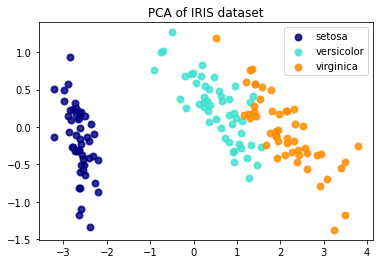

In [16]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[Y == i, 0], X_r[Y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.show()